In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
# reading the data
path_file = "data.csv"
data = pd.read_csv(path_file)
data.head()
data.shape
data.dtypes # check all columns have expected data types


PERMNO      int64
DATE        int64
prc       float64
adjprc    float64
RET        object
VOL       float64
EXCHCD    float64
RET_DL    float64
dtype: object

In [4]:
# coerce RET to be numeric
data.RET = pd.to_numeric(data.RET, errors = "coerce")

# format date using pandas to_datetime() method
data.DATE = pd.to_datetime(data.DATE, format = "%Y%m%d")

# select only data from 1962 onwards
data = data[data.DATE.dt.year>=1962]


In [5]:
data

,PERMNO,DATE,prc,adjprc,RET,VOL,EXCHCD,RET_DL
0,10000,1986-01-07,2.5625,2.5625,NaN,1000.0,3.0,NaN
1,10000,1986-01-08,2.5000,2.5000,-0.024390,12800.0,NaN,-0.02439
2,10000,1986-01-09,2.5000,2.5000,0.000000,1400.0,NaN,0.00000
3,10000,1986-01-10,2.5000,2.5000,0.000000,8500.0,3.0,0.00000
4,10000,1986-01-13,2.6250,2.6250,0.050000,5450.0,NaN,0.05000
5,10001,1986-01-07,10.0000,10.0000,0.010000,5000.0,1.0,NaN
6,10001,1986-01-08,10.1000,10.1000,0.009901,6000.0,1.0,0.00990
7,10001,1986-01-09,10.2000,10.2000,0.009901,7000.0,1.0,0.00990


In [6]:
# data is in long format. Will create wide matrices with volumes and prices
vol = data.pivot(index="DATE", columns="PERMNO", values="VOL")
ret = data.pivot(index="DATE", columns="PERMNO", values="RET")


In [9]:
# remove possible nonsensical returns
ret[ret<-1] = -1
ret.head()

# unique dates
dates = vol.index
total_days = len(dates)
total_days


5

In [19]:
ret

PERMNO,10000,10001
DATE,,
1986-01-07,0.00000,0.000000
1986-01-08,-0.02439,0.009901
1986-01-09,0.00000,0.009901
1986-01-10,0.00000,NaN
1986-01-13,0.05000,NaN


In [17]:
prc = (ret + 1.).cumprod()

In [18]:
prc

PERMNO,10000,10001
DATE,,
1986-01-07,1.00000,1.000000
1986-01-08,0.97561,1.009901
1986-01-09,0.97561,1.019900
1986-01-10,0.97561,NaN
1986-01-13,1.02439,NaN


In [26]:
prc = prc.dropna()


In [27]:
prc.transpose()

DATE,1986-01-07,1986-01-08,1986-01-09
PERMNO,,,
10000,1.0,0.975610,0.97561
10001,1.0,1.009901,1.01990


In [24]:
from sklearn.metrics import pairwise_distances
import itertools

In [28]:
pairwise_distances(prc.transpose(), prc.transpose())

array([[0.        , 0.05601321],
       [0.05601321, 0.        ]])

In [29]:
pairwise_distances(prc.transpose())

array([[0.        , 0.05601321],
       [0.05601321, 0.        ]])

In [31]:
np.triu_indices(2, k=1)

(array([0]), array([1]))

In [37]:
ret

PERMNO,10000,10001
DATE,,
1986-01-07,0.00000,0.000000
1986-01-08,-0.02439,0.009901
1986-01-09,0.00000,0.009901
1986-01-10,0.00000,NaN
1986-01-13,0.05000,NaN


In [38]:
ret.shape[1]

2

In [23]:
import numpy as np
import pandas as pd

# Create dummy data
np.random.seed(42)
duration = 60
dates = pd.date_range('2023-01-01', periods=duration)
trade_ret = pd.DataFrame(np.random.normal(0, 1.5, (duration, 2)), index=dates)
trade_prc = (trade_ret + 1).cumprod()

# Create a sample pair
pair = pd.Series({
    'leg_1': 0,  # Using column index 0
    'leg_2': 1,   # Using column index 1
    'spread_std': 0.5  # Arbitrary standard deviation
})

# Calculate spread (p1 - p2)/spread_std
pair_calcs = pd.DataFrame({
    'p_1': trade_prc[0],
    'p_2': trade_prc[1],
    's': (trade_prc[0] - trade_prc[1]) / 0.5
}, index=dates)

# print("Price Series 1:\n", trade_prc[0].round(2))
# print("\nPrice Series 2:\n", trade_prc[1].round(2))
# print("\nNormalized Spread (s):\n", pair_calcs['s'].round(2))

In [24]:
pair_calcs

,p_1,p_2,s
2023-01-01,1.745071e+00,0.792604,1.904935
2023-01-02,3.440465e+00,2.603342,1.674247
2023-01-03,2.232070e+00,1.689034,1.086073
2023-01-04,7.519442e+00,3.633369,7.772145
2023-01-05,2.224164e+00,6.590350,-8.732373
2023-01-06,6.780885e-01,1.986367,-2.616557
2023-01-07,9.241963e-01,-3.714348,9.277089
2023-01-08,-1.467048e+00,-0.581551,-1.770994
2023-01-09,7.617596e-01,-0.855677,3.234873
2023-01-10,-2.757845e-01,0.957036,-2.465642


In [25]:
d_open = 1.5  # Threshold for opening trades
last_day = 9   # Last day in our sample
trigger_points = np.abs(pair_calcs['s']) > d_open
print("\nSpread > Threshold:\n", trigger_points)


Spread > Threshold:
 2023-01-01     True
2023-01-02     True
2023-01-03    False
2023-01-04     True
2023-01-05     True
2023-01-06     True
2023-01-07     True
2023-01-08     True
2023-01-09     True
2023-01-10     True
2023-01-11     True
2023-01-12    False
2023-01-13    False
2023-01-14     True
2023-01-15     True
2023-01-16     True
2023-01-17     True
2023-01-18     True
2023-01-19     True
2023-01-20     True
2023-01-21     True
2023-01-22     True
2023-01-23    False
2023-01-24    False
2023-01-25     True
2023-01-26    False
2023-01-27    False
2023-01-28     True
2023-01-29     True
2023-01-30     True
2023-01-31     True
2023-02-01     True
2023-02-02     True
2023-02-03     True
2023-02-04    False
2023-02-05     True
2023-02-06     True
2023-02-07     True
2023-02-08     True
2023-02-09     True
2023-02-10     True
2023-02-11     True
2023-02-12    False
2023-02-13     True
2023-02-14     True
2023-02-15     True
2023-02-16     True
2023-02-17     True
2023-02-18     Tru

In [26]:
trade_ret.index = np.arange(trade_ret.shape[0])
open_ids = np.array(trade_ret.index * trigger_points)
print("\nRaw open_ids:\n", open_ids)

# trade_ret.shape[0]



Raw open_ids:
 [ 0  1  0  3  4  5  6  7  8  9 10  0  0 13 14 15 16 17 18 19 20 21  0  0
 24  0  0 27 28 29 30 31 32 33  0 35 36 37 38 39 40 41  0 43 44 45 46 47
 48 49 50  0  0  0  0  0 56 57 58 59]


In [27]:
open_ids = open_ids[open_ids != 0]
print("\nNon-zero open_ids:\n", open_ids)



Non-zero open_ids:
 [ 1  3  4  5  6  7  8  9 10 13 14 15 16 17 18 19 20 21 24 27 28 29 30 31
 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 56 57 58 59]


In [40]:
# last_day = max(pair_calcs.p_1.last_valid_index(), pair_calcs.p_2.last_valid_index())
# open_ids = open_ids[open_ids <= last_day]
sign_changes = np.sign(pair_calcs['s']).diff() != 0
close_ids = np.array(trade_ret.index[sign_changes])
close_ids
# np.sign(pair_calcs['s'])

array([ 0,  4,  6,  7,  8,  9, 12, 16, 17, 18, 22, 24, 31, 39, 47, 51, 58])

In [51]:
# rt_df = pd.read_csv("data/NSE_Retruns.csv")
rt_df.dtypes

Date              object
ABB.NS           float64
ACC.NS           float64
ADANIENT.NS      float64
ADANIPORTS.NS    float64
                  ...   
YESBANK.NS       float64
ZEEL.NS          float64
ZEELEARN.NS      float64
ZENSARTECH.NS    float64
ZYDUSLIFE.NS     float64
Length: 101, dtype: object

In [3]:
n_pairs = 10
rt_df = pd.read_csv("data/NSE_Retruns.csv")
rt_df['Date'] = pd.to_datetime(rt_df['Date'])  # Convert string to datetime
rt_df.set_index('Date', inplace=True) 
# formation period total return including dividends
form_ret = rt_df.loc["2002-01-01":"2002-12-31"].copy()
trade_ret = rt_df.loc["2003-01-01":"2003-06-30"]


In [8]:
nan_cols = rt_df.columns[rt_df.isna().all()].tolist()
nan_cols

['HINDVEN.NS', 'IBULHSGFIN.NS', 'STRTECH.NS']

In [9]:
rt_df.head()
import pandas as pd
import numpy as np
from typing import Optional, Tuple

# Optional helper for displaying nicely in the UI (if available)
try:
    from ace_tools import display_dataframe_to_user
except Exception:
    display_dataframe_to_user = None

def make_table_4_1(
    df: pd.DataFrame,
    window: int = 252,
    returns_are_percent: bool = False,
    min_non_na_ratio: float = 0.8,
    min_stocks_in_window: int = 10,
) -> pd.DataFrame:
    """
    Build 'Table 4.1: Descriptive Statistics' from a wide daily-returns DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        Date-indexed DataFrame of daily returns with stock tickers as columns.
        NaN indicates the stock was not in Nifty50 during that date.
    window : int, default 252
        Rolling window (in trading days) used for cross-sectional correlation.
    returns_are_percent : bool, default True
        If True, df values are in percent units (e.g., 0.5 means 0.5%). If False, decimals.
    min_non_na_ratio : float, default 0.8
        For the correlation window, require each included column to have at least this fraction
        of non-NaN observations within the window.
    min_stocks_in_window : int, default 10
        Minimum number of stocks required to compute a window correlation statistic.
    
    Returns
    -------
    pd.DataFrame
        Table with rows: Daily Return (%), Annualized Volatility (%), Cross-Sectional Correlation (Rolling).
        Columns: Mean, Std. Dev., Min, Max.
    """
    df = df.copy()
    # Ensure datetime index and sorted
    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            raise ValueError("Index must be datetime-like or convertible to DatetimeIndex.") from e
    df = df.sort_index()

    # Work with two standardized frames:
    # - perc: values in percentage points (e.g., 0.5 means 0.5%)
    # - dec: decimal returns (e.g., 0.005 means 0.5%)
    if returns_are_percent:
        perc = df
        dec = df / 100.0
    else:
        dec = df
        perc = df * 100.0

    # --- Daily return stats (across all stocks/dates) ---
    flat = perc.values.flatten()
    flat = flat[~np.isnan(flat)]
    if flat.size == 0:
        raise ValueError("No non-NaN daily returns found in the DataFrame.")
    daily_ret_mean = np.nanmean(flat)
    daily_ret_std = np.nanstd(flat, ddof=0)
    daily_ret_min = np.nanmin(flat)
    daily_ret_max = np.nanmax(flat)

    # --- Annualized volatility per stock, then cross-sectional summary ---
    # Require a reasonable number of observations to include a stock
    counts = dec.count(axis=0)
    eligible_cols = counts[counts >= window].index  # at least 'window' days overall
    ann_vol_per_stock = dec[eligible_cols].std(axis=0, ddof=0) * np.sqrt(252) * 100.0  # back to percent
    if ann_vol_per_stock.size == 0:
        # Fallback: compute with whatever data is available
        ann_vol_per_stock = dec.std(axis=0, ddof=0) * np.sqrt(252) * 100.0
        ann_vol_per_stock = ann_vol_per_stock.dropna()

    ann_vol_mean = float(np.nanmean(ann_vol_per_stock.values)) if ann_vol_per_stock.size else np.nan
    ann_vol_std = float(np.nanstd(ann_vol_per_stock.values, ddof=0)) if ann_vol_per_stock.size else np.nan
    ann_vol_min = float(np.nanmin(ann_vol_per_stock.values)) if ann_vol_per_stock.size else np.nan
    ann_vol_max = float(np.nanmax(ann_vol_per_stock.values)) if ann_vol_per_stock.size else np.nan

    # --- Cross-sectional average correlation via rolling windows ---
    # For each rolling window, keep columns that have >= min_non_na_ratio non-NaN in that window
    avg_corr_series = []
    dates = []

    # Use rolling window indices
    if len(df) >= window:
        for start in range(0, len(df) - window + 1):
            end = start + window
            block = dec.iloc[start:end]
            # Keep columns with sufficient data in window
            good_cols = block.columns[(block.notna().sum(axis=0) >= int(min_non_na_ratio * window))]
            block = block[good_cols]
            # Need at least min_stocks_in_window stocks
            if block.shape[1] >= min_stocks_in_window:
                corr = block.corr(min_periods=int(min_non_na_ratio * window))
                # Average of upper triangle (excluding diagonal)
                n = corr.shape[0]
                if n >= 2:
                    triu_vals = corr.values[np.triu_indices(n, k=1)]
                    if np.isfinite(triu_vals).sum() > 0:
                        avg_corr_series.append(np.nanmean(triu_vals))
                        dates.append(df.index[start + window - 1])
    # Summaries of the rolling average correlations
    if len(avg_corr_series) > 0:
        avg_corr_series = np.array(avg_corr_series, dtype=float)
        xsec_corr_mean = float(np.nanmean(avg_corr_series))
        xsec_corr_std = float(np.nanstd(avg_corr_series, ddof=0))
        xsec_corr_min = float(np.nanmin(avg_corr_series))
        xsec_corr_max = float(np.nanmax(avg_corr_series))
    else:
        # Fallback: compute static average pairwise correlation on the full sample
        corr = dec.corr(min_periods=window//2)
        n = corr.shape[0]
        if n >= 2:
            triu_vals = corr.values[np.triu_indices(n, k=1)]
            finite_vals = triu_vals[np.isfinite(triu_vals)]
            if finite_vals.size:
                xsec_corr_mean = float(np.nanmean(finite_vals))
                xsec_corr_std = float(np.nanstd(finite_vals, ddof=0))
                xsec_corr_min = float(np.nanmin(finite_vals))
                xsec_corr_max = float(np.nanmax(finite_vals))
            else:
                xsec_corr_mean = xsec_corr_std = xsec_corr_min = xsec_corr_max = np.nan
        else:
            xsec_corr_mean = xsec_corr_std = xsec_corr_min = xsec_corr_max = np.nan

    # Assemble the final table
    table = pd.DataFrame({
        "Mean": [daily_ret_mean, ann_vol_mean, xsec_corr_mean],
        "Std. Dev.": [daily_ret_std, ann_vol_std, xsec_corr_std],
        "Min": [daily_ret_min, ann_vol_min, xsec_corr_min],
        "Max": [daily_ret_max, ann_vol_max, xsec_corr_max],
    }, index=[
        "Daily Return (%)",
        "Annualized Volatility (%)",
        "Cross-Sectional Correlation (Rolling)"
    ])

    # Round for neatness
    table = table.round({
        "Mean": 2, "Std. Dev.": 2, "Min": 2, "Max": 2
    })
    return table


table_4_1 = make_table_4_1(rt_df)  # df: Date index, tickers as columns, daily % returns, NaNs allowed
print(table_4_1)

# form_ret.dtypes
# form_ret['Date'] = pd.to_datetime(form_ret['Date'])  # Convert string to datetime
# form_ret.set_index('Date', inplace=True)       # Set as index
#                                         Mean  Std. Dev.     Min      Max
# Daily Return (%)                         0.17      21.81 -100.00  9984.95
# Annualized Volatility (%)              112.47     391.16   22.07  3727.77
# Cross-Sectional Correlation (Rolling)    0.25       0.06    0.12     0.41


                                         Mean  Std. Dev.     Min      Max
Daily Return (%)                         0.17      21.81 -100.00  9984.95
Annualized Volatility (%)              112.47     391.16   22.07  3727.77
Cross-Sectional Correlation (Rolling)    0.25       0.06    0.12     0.41


In [13]:
rt_df.head()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_seq_items', None) # For displaying long lists/sequences

to_remove = [
    "ADANIENT.NS", "AMBUJACEM.NS", "BAJFINANCE.NS", "BPCL.NS", "CIPLA.NS",
    "DRREDDY.NS", "EICHERMOT.NS", "GAIL.NS", "GRASIM.NS", "HDFCMFGETF.NS",
    "HINDZINC.NS", "HINDPETRO.NS", "IOC.NS", "KOTAKBANK.NS", "RELIANCE.NS",
    "TATASTEEL.NS", "ULTRACEMCO.NS", "UNITECH.NS", "ZENSARTECH.NS", "SESHAPAPER.NS"
]
optional_remove = ["LT.NS", "LUPIN.NS", "M&M.NS", "TCS.NS", "VEDL.NS", "HINDVEN.NS", "IBULHSGFIN.NS", "STRTECH.NS"]

rt_df_1 = rt_df.drop(columns=to_remove+optional_remove, errors="ignore")


rt_df_1.describe(percentiles=[0.01,0.05,0.95,0.99]).T[['mean','std','min','max']]

# from sklearn.metrics import pairwise_distances
# import itertools
# form_ret[form_ret.isna()] = 0

# pairs = get_pairs(form_ret, n_pairs = 5)

# pairs

,mean,std,min,max
ABB.NS,0.001944,0.063164,-0.169731,4.433939
ACC.NS,0.000727,0.020039,-0.149378,0.144845
ADANIPORTS.NS,0.000818,0.026663,-0.211497,0.200022
APOLLOHOSP.NS,0.001121,0.022043,-0.149895,0.200068
ASHOKLEY.NS,0.001411,0.029636,-0.246274,0.632964
ASIANPAINT.NS,0.001022,0.016549,-0.140279,0.096587
AUROPHARMA.NS,0.001379,0.032946,-0.499977,1.002193
AXISBANK.NS,0.001255,0.025953,-0.279108,0.200417
BAJAJ-AUTO.NS,0.001039,0.019895,-0.424335,0.134238
BAJAJFINSV.NS,0.000871,0.027738,-0.926483,0.200068


In [14]:
table_4_1 = make_table_4_1(rt_df_1)  # df: Date index, tickers as columns, daily % returns, NaNs allowed
print(table_4_1)

                                        Mean  Std. Dev.    Min     Max
Daily Return (%)                        0.09       2.74 -92.65  443.39
Annualized Volatility (%)              41.61      12.36  22.07  100.26
Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


In [11]:
table_4_1 = make_table_4_1(rt_df_1)  # df: Date index, tickers as columns, daily % returns, NaNs allowed
print(table_4_1)
#                                         Mean  Std. Dev.    Min     Max
# Daily Return (%)                        0.09       2.74 -92.65  443.39
# Annualized Volatility (%)              41.61      12.36  22.07  100.26
# Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


                                        Mean  Std. Dev.    Min     Max
Daily Return (%)                        0.09       2.74 -92.65  443.39
Annualized Volatility (%)              41.61      12.36  22.07  100.26
Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


In [80]:
trade_ret_dates = trade_ret.index
trade_ret.index = np.arange(trade_ret.shape[0])
trade_ret.iloc[0, :] = 0

# to treat delisting correctly, identify last non NA values
last_valid_ret_ind = trade_ret.apply(pd.Series.last_valid_index)

# can safely replace NAs with 0 before this index.
for idx, column in enumerate(trade_ret.columns):
    r = trade_ret.loc[trade_ret.index[0]:last_valid_ret_ind.iloc[idx], column]
    r = r.fillna(0)
    trade_ret.loc[trade_ret.index[0]:last_valid_ret_ind.iloc[idx], column] = r

# "normalize" trading period prices to start at 1
trade_prc = (trade_ret + 1.).cumprod()

# total number of days in trading period
trading_days = trade_prc.shape[0]

# total number of pairs considered
num_pairs = 1 #pairs.shape[0]

# storage for intermediate calculations
directions = pd.DataFrame(np.zeros((trading_days, num_pairs)))
payoffs = pd.DataFrame(np.zeros((trading_days, num_pairs)))

/var/folders/cm/69k42yy95z5gwss1vrkqcdgm0000gn/T/ipykernel_45483/1442191822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_ret.iloc[0, :] = 0
/var/folders/cm/69k42yy95z5gwss1vrkqcdgm0000gn/T/ipykernel_45483/1442191822.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_ret.loc[trade_ret.index[0]:last_valid_ret_ind.iloc[idx], column] = r


In [81]:
pair = pairs.iloc[1]

In [110]:
pair_calcs = pd.DataFrame(np.zeros((trading_days, 9)),
                          columns=["p_1", "p_2", "s", "direction", "w_1", "w_2", "r_1", "r_2", "payoff"])

# identify pair legs, build prices, returns and spread vectors
leg_1 = pair.leg_1
leg_2 = pair.leg_2
pair_calcs.p_1 = trade_prc.loc[:, leg_1]
pair_calcs.p_2 = trade_prc.loc[:, leg_2]
pair_calcs.r_1 = trade_ret.loc[:, leg_1]
pair_calcs.r_2 = trade_ret.loc[:, leg_2]
last_day = max(pair_calcs.p_1.last_valid_index(), pair_calcs.p_2.last_valid_index())
pair_calcs.r_1 = pair_calcs.r_1.fillna(0)
pair_calcs.r_2 = pair_calcs.r_2.fillna(0)

pair_calcs.s = (pair_calcs.p_1 - pair_calcs.p_2) / pair.spread_std
pair_calcs
open_ids = np.array(trade_ret.index * (np.abs(pair_calcs.s) > d_open))
open_ids = open_ids[open_ids != 0]
open_ids = open_ids[open_ids <= last_day]

close_ids = np.array(trade_ret.index[np.sign(pair_calcs.s).diff() != 0])
close_ids = close_ids[~np.isnan(close_ids)]
close_ids = np.append(close_ids, last_day)

# date when first trade opens
if len(open_ids) != 0:
    t_open = open_ids[0]
else:
    t_open = np.nan
print(open_ids)
print(close_ids)

[ 14  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  87  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128]
[  0   1  42  47  71  75  90  91  92  93  94  97 128]


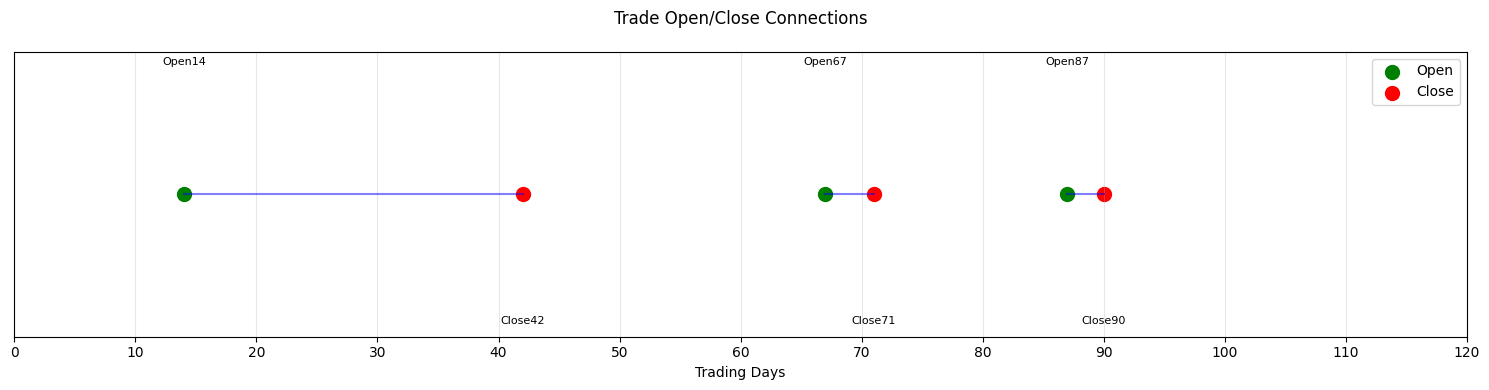

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Your data
# Create figure
plt.figure(figsize=(15, 4))

# Simulate your while loop logic to pair opens with closes
current_open = None
connections = []
for day in range(129):
    if day in open_ids:
        current_open = day
    elif day in close_ids and current_open is not None:
        connections.append((current_open, day))
        current_open = None

# Plot connections
for i, (op, cl) in enumerate(connections):
    plt.plot([op, cl], [1, 1], 'b-', alpha=0.5)  # Connection line
    plt.scatter(op, 1, color='green', marker='o', s=100, label='Open' if i==0 else "")
    plt.scatter(cl, 1, color='red', marker='o', s=100, label='Close' if i==0 else "")
    plt.text(op, 1.05, f'Open{op}', ha='center', fontsize=8)
    plt.text(cl, 0.95, f'Close{cl}', ha='center', fontsize=8)

# Formatting
plt.yticks([])
plt.title('Trade Open/Close Connections', pad=20)
plt.xlabel('Trading Days')
plt.xticks(np.arange(0, 129, 10))  # Every 10 days
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/cm/69k42yy95z5gwss1vrkqcdgm0000gn/T/ipykernel_45483/3532632269.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pair_calcs.w_1[(t_open + wait1d):(t_close + 1)] = np.append(1., (
/var/folders/cm/69k42yy95z5gwss1vrkqcdgm0000gn

[(np.int64(14), np.int64(42)), (np.int64(49), np.int64(71)), (np.int64(87), np.int64(90)), (np.int64(97), np.int64(128))]


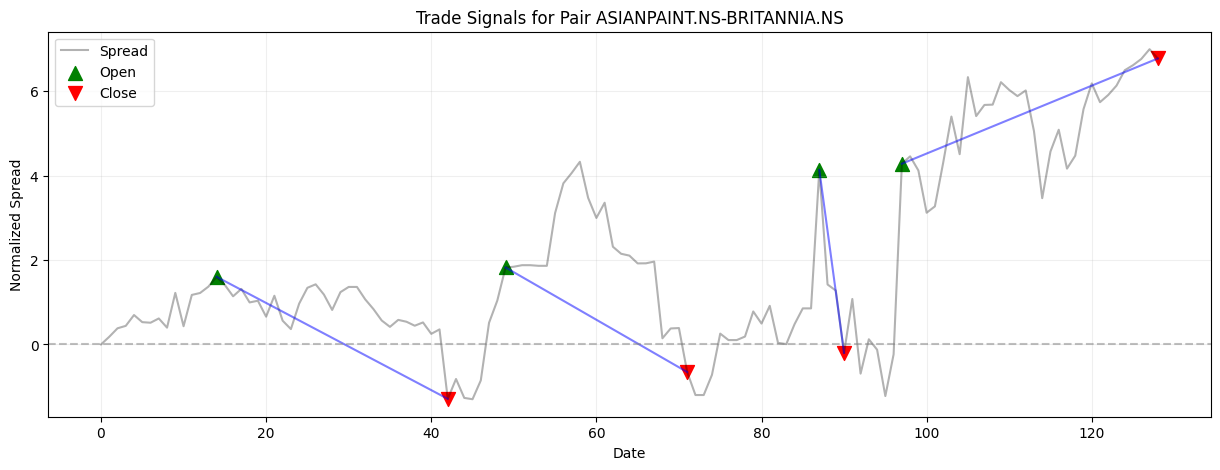

In [111]:
wait1d = 1
connections = []

while ~np.isnan(t_open) & (t_open < last_day - wait1d):
    # check when trade closed
    t_close = np.min(close_ids[close_ids > t_open + wait1d])
    connections.append((t_open, t_close))
    # store direction of trade over period when trade is open
    pair_calcs.loc[(t_open + wait1d + 1): (t_close + 1), "direction"] = -np.sign(
        pair_calcs.loc[t_open - wait1d, "s"])

    # update w1 and w2
    pair_calcs.w_1[(t_open + wait1d):(t_close + 1)] = np.append(1., (
            1 + pair_calcs.r_1[(t_open + wait1d): (t_close)]).cumprod())
    pair_calcs.w_2[(t_open + wait1d):(t_close + 1)] = np.append(1., (
            1 + pair_calcs.r_2[(t_open + wait1d): (t_close)]).cumprod())

    # update t_open => moves to next trade for this pair
    if any(open_ids > t_close):
        t_open = open_ids[open_ids > t_close][0]
    else:
        t_open = np.nan
print(connections)
plt.figure(figsize=(15, 5))
plt.plot(pair_calcs.s, 'k-', alpha=0.3, label='Spread')

for i, (op, cl) in enumerate(connections):
    plt.plot([op, cl], 
            [pair_calcs.s.loc[op], pair_calcs.s.loc[cl]], 
            'b-', alpha=0.5)
    plt.scatter(op, pair_calcs.s.loc[op], color='green', 
              marker='^', s=100, label='Open' if i==0 else "")
    plt.scatter(cl, pair_calcs.s.loc[cl], color='red',
              marker='v', s=100, label='Close' if i==0 else "")

plt.title(f'Trade Signals for Pair {pair.leg_1}-{pair.leg_2}')
plt.xlabel('Date')
plt.ylabel('Normalized Spread')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# pair_calcs

In [112]:
pd.set_option('display.max_rows', 500)
from IPython.display import display
display(pair_calcs)

,p_1,p_2,s,direction,w_1,w_2,r_1,r_2,payoff
0,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,1.005813,1.001552,0.181716,0.0,0.000000,0.000000,0.005813,0.001552,0.0
2,1.007520,0.998545,0.382767,0.0,0.000000,0.000000,0.001697,-0.003002,0.0
3,1.012271,1.001940,0.440628,0.0,0.000000,0.000000,0.004716,0.003400,0.0
4,1.017807,1.001455,0.697431,0.0,0.000000,0.000000,0.005469,-0.000484,0.0
5,1.017530,1.005141,0.528412,0.0,0.000000,0.000000,-0.000272,0.003680,0.0
6,1.017991,1.005917,0.515004,0.0,0.000000,0.000000,0.000453,0.000772,0.0
7,1.019975,1.005529,0.616156,0.0,0.000000,0.000000,0.001949,-0.000386,0.0
8,1.014578,1.005238,0.398352,0.0,0.000000,0.000000,-0.005292,-0.000289,0.0
9,1.033030,1.004365,1.222621,0.0,0.000000,0.000000,0.018188,-0.000868,0.0


In [114]:
pair_calcs["payoffs"] = pair_calcs.direction * (pair_calcs.w_1 * pair_calcs.r_1 - pair_calcs.w_2 * pair_calcs.r_2)
payoffs.loc[:, 1] = pair_calcs["payoffs"]
directions.loc[:, 1] = pair_calcs["direction"]

directions.index = trade_ret_dates
payoffs.index = trade_ret_dates
pair_calcs

,p_1,p_2,s,direction,w_1,w_2,r_1,r_2,payoff,payoffs
0,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.005813,1.001552,0.181716,0.0,0.000000,0.000000,0.005813,0.001552,0.0,0.000000
2,1.007520,0.998545,0.382767,0.0,0.000000,0.000000,0.001697,-0.003002,0.0,0.000000
3,1.012271,1.001940,0.440628,0.0,0.000000,0.000000,0.004716,0.003400,0.0,0.000000
4,1.017807,1.001455,0.697431,0.0,0.000000,0.000000,0.005469,-0.000484,0.0,0.000000
5,1.017530,1.005141,0.528412,0.0,0.000000,0.000000,-0.000272,0.003680,0.0,-0.000000
6,1.017991,1.005917,0.515004,0.0,0.000000,0.000000,0.000453,0.000772,0.0,0.000000
7,1.019975,1.005529,0.616156,0.0,0.000000,0.000000,0.001949,-0.000386,0.0,0.000000
8,1.014578,1.005238,0.398352,0.0,0.000000,0.000000,-0.005292,-0.000289,0.0,0.000000
9,1.033030,1.004365,1.222621,0.0,0.000000,0.000000,0.018188,-0.000868,0.0,0.000000


In [116]:
returns_cc = payoffs.mean(axis=1)

# for fully-invested approach, capital is divided among open pairs

num_open_pairs = (directions != 0).sum(axis=1)
num_open_pairs[num_open_pairs > 0] = 1. / num_open_pairs
weights_fi = pd.concat([num_open_pairs] * num_pairs, axis=1)
returns_fi = (weights_fi * payoffs).sum(axis=1)

# return everything as a dictionary
result={"pairs": pairs, "directions": directions, "payoffs": payoffs, "returns_cc": returns_cc,
            "returns_fi": returns_fi}

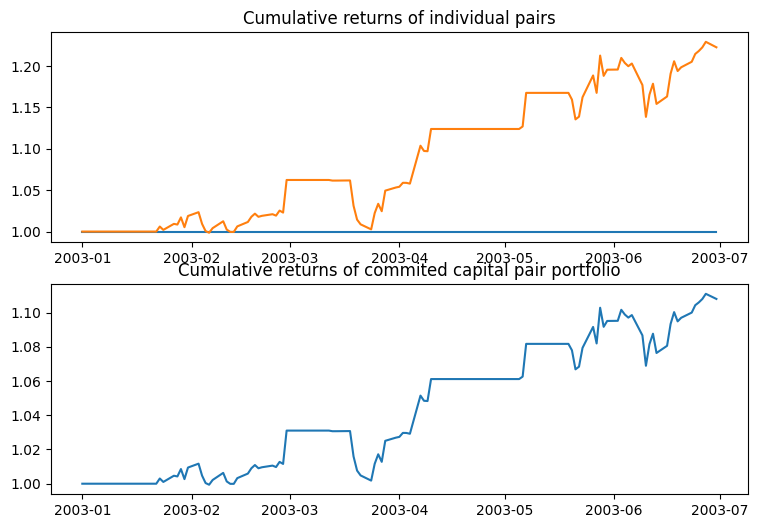

In [119]:
pair_rets = result["payoffs"]

fig = plt.figure();
fig.set_size_inches(9, 6);
ax1 = fig.add_subplot(2,1,1);
ax1.plot((1+pair_rets).cumprod());
ax1.set_title("Cumulative returns of individual pairs");
ax2 = fig.add_subplot(2,1,2);
ax2.plot((1+result["returns_cc"]).cumprod());
ax2.set_title("Cumulative returns of commited capital pair portfolio");

In [ ]:
dates = rt_df.index
total_days = len(dates)
total_days

n_formation = 12
n_trading = 6
num_pairs = 5
d_open = 2
wait1d = 1

# storage for results
strat_returns_cc_w1d = pd.DataFrame(np.zeros((total_days, n_trading)), index = dates, columns = ["P_"+str(i+1) for i in range(n_trading)])
strat_returns_fi_w1d = strat_returns_cc_w1d.copy()
num_open_pairs_w1d = pd.DataFrame(np.zeros((total_days, n_trading)), index = dates, columns = ["P_"+str(i+1) for i in range(n_trading)])

# create indices of months in sample
month_id = pd.Series(dates.month)
month_id = (month_id.diff()!=0)
month_id[0] = 0
month_id = month_id.cumsum()

unique_months = month_id.unique()


In [6]:
dates = rt_df.index
total_days = len(dates) #5588
n_formation = 12
n_trading = 6
num_pairs = 5
d_open = 2
wait1d = 1
# storage for results
strat_returns_cc_w1d = pd.DataFrame(np.zeros((total_days, n_trading)), index = dates, columns = ["P_"+str(i+1) for i in range(n_trading)])
strat_returns_fi_w1d = strat_returns_cc_w1d.copy()
num_open_pairs_w1d = pd.DataFrame(np.zeros((total_days, n_trading)), index = dates, columns = ["P_"+str(i+1) for i in range(n_trading)])
print(strat_returns_cc_w1d)
print(num_open_pairs_w1d)

month_id = pd.Series(dates.month)
month_id = (month_id.diff()!=0)
month_id[0] = 0
month_id = month_id.cumsum()

unique_months = month_id.unique()
print(unique_months)

            P_1  P_2  P_3  P_4  P_5  P_6
Date                                    
2002-07-01  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-02  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-03  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-04  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-05  0.0  0.0  0.0  0.0  0.0  0.0
...         ...  ...  ...  ...  ...  ...
2024-12-23  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-24  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-26  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-27  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-30  0.0  0.0  0.0  0.0  0.0  0.0

[5588 rows x 6 columns]
            P_1  P_2  P_3  P_4  P_5  P_6
Date                                    
2002-07-01  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-02  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-03  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-04  0.0  0.0  0.0  0.0  0.0  0.0
2002-07-05  0.0  0.0  0.0  0.0  0.0  0.0
...         ...  ...  ...  ...  ...  ...
2024-12-23  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-24  0.0  0.0  0.0  0.0  0.0  0.0
2024-12-26  0.0  0.0  0.0  0.0  

/var/folders/cm/69k42yy95z5gwss1vrkqcdgm0000gn/T/ipykernel_49829/1635080098.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  month_id[0] = 0


In [123]:
date_rng = np.arange(start=n_formation + 0, stop=len(unique_months) - n_trading + 1, step=n_trading)
date_rng

array([ 12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,  78,  84,
        90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150, 156, 162,
       168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228, 234, 240,
       246, 252, 258, 264])

In [125]:
train = np.array(unique_months[18-n_formation:18])
test = np.array(unique_months[18:18+n_trading])
print(train)
print(test)

[6 7 8 9 10 11 12 13 14 15 16 17]
[18 19 20 21 22 23]


In [12]:
portfolios = []
# from Utils import process_single_pair
# from Utils import calculate_pairs_returns
# from Utils import get_pairs



import time
i_port = 4
port_name = "P_" + str(i_port+1)

print("Running portfolio " + str(i_port+1) + " of ", str(n_trading))
tic = time.perf_counter()

# Each portfolio pairs can start after (n_formation + i - 1) months 
# eg. portfolio 1 can start after 12 months if n_formation = 12
#     portfolio 2 can start after 13 months etc


date_rng = np.arange(start=n_formation + i_port, stop=len(unique_months) - n_trading + 1, step=n_trading)
print(date_rng)
for i in date_rng: 
    #tic = time.perf_counter()
    print("running for i (date_rng) ", i)
    train = np.array(unique_months[i-n_formation:i])
    test = np.array(unique_months[i:i+n_trading])
    form_dates = pd.date_range(dates[month_id == train.min()][0], dates[month_id == train.max()][-1])
    trade_dates = pd.date_range(dates[month_id == test.min()][0], dates[month_id == test.max()][-1])    
    # print("where train and test are ", train, test, form_dates.min(), form_dates.max())
    portfolios.append({
                    'portfolio': port_name,
                    'formation_start': form_dates.min(),
                    'formation_end': form_dates.max(),
                    'trading_start': trade_dates.min(),
                    'trading_end': trade_dates.max(),
                    'formation_days': (form_dates.max() - form_dates.min()).days + 1,
                    'trading_days': (trade_dates.max() - trade_dates.min()).days + 1
                })

    #print("Formation: ", form_dates[0], " to ", form_dates[-1])
    #print("Trading: ", trade_dates[0], " to ", trade_dates[-1])

    # check available stocks

    # select only stocks:
    #  - with returns for entire formation period
    #  - with volumes > 0 for every day of formation period

    form_ret = rt_df[form_dates[0]:form_dates[-1]].copy() #rt_df

    # daily volumes for formation period
    # form_vol = vol[form_dates[0]:form_dates[-1]].copy()
    # form_vol = form_vol.fillna(0)

    #toc = time.perf_counter()
    #print(f"Slicing data took {(toc - tic):0.4f} seconds")

    #tic = time.perf_counter()
    # boolean to identify eligible stocks
    ava_stocks = form_ret.isna().sum() == 0

    # formation and trading returns for selected stocks
    form_ret = rt_df.loc[form_dates[0]:form_dates[-1], ava_stocks]
    trade_ret = rt_df.loc[trade_dates[0]:trade_dates[-1], ava_stocks]

    # select pairs
    # pairs = get_pairs(form_ret, 5)
    # print(pairs)
    #toc = time.perf_counter()
    #print(f"Selecting pairs took {(toc - tic):0.4f} seconds")

    #tic = time.perf_counter()
    # trade pairs
    # trades = calculate_pairs_returns(trade_ret, pairs, d_open, wait1d)    
    #toc = time.perf_counter()
    #print(f"Calculating pairs returns took {(toc - tic):0.4f} seconds")
    
    # store results
    # strat_returns_cc_w1d.loc[trade_dates[0]:trade_dates[-1], port_name] = trades["returns_cc"].values
    # strat_returns_fi_w1d.loc[trade_dates[0]:trade_dates[-1], port_name] = trades["returns_fi"].values
    # num_open_pairs_w1d.loc[trade_dates[0]:trade_dates[-1], port_name] = (trades["directions"]!=0).sum(axis=1).values


Running portfolio 5 of  6
[ 16  22  28  34  40  46  52  58  64  70  76  82  88  94 100 106 112 118
 124 130 136 142 148 154 160 166 172 178 184 190 196 202 208 214 220 226
 232 238 244 250 256 262]
running for i (date_rng)  16
running for i (date_rng)  22
running for i (date_rng)  28
running for i (date_rng)  34
running for i (date_rng)  40
running for i (date_rng)  46
running for i (date_rng)  52
running for i (date_rng)  58
running for i (date_rng)  64
running for i (date_rng)  70
running for i (date_rng)  76
running for i (date_rng)  82
running for i (date_rng)  88
running for i (date_rng)  94
running for i (date_rng)  100
running for i (date_rng)  106
running for i (date_rng)  112
running for i (date_rng)  118
running for i (date_rng)  124
running for i (date_rng)  130
running for i (date_rng)  136
running for i (date_rng)  142
running for i (date_rng)  148
running for i (date_rng)  154
running for i (date_rng)  160
running for i (date_rng)  166
running for i (date_rng)  172
runnin

In [234]:
portfolio_timeline = pd.DataFrame(portfolios)

In [235]:
portfolio_timeline

,portfolio,formation_start,formation_end,trading_start,trading_end,formation_days,trading_days
0,P_5,2002-11-01,2003-10-31,2003-11-03,2004-04-30,365,180
1,P_5,2003-05-01,2004-04-30,2004-05-03,2004-10-29,366,180
2,P_5,2003-11-03,2004-10-29,2004-11-01,2005-04-29,362,180
3,P_5,2004-05-03,2005-04-29,2005-05-02,2005-10-31,362,183
4,P_5,2004-11-01,2005-10-31,2005-11-02,2006-04-28,365,178
5,P_5,2005-05-02,2006-04-28,2006-05-02,2006-10-31,362,183
6,P_5,2005-11-02,2006-10-31,2006-11-01,2007-04-30,364,181
7,P_5,2006-05-02,2007-04-30,2007-05-03,2007-10-31,364,182
8,P_5,2006-11-01,2007-10-31,2007-11-01,2008-04-30,365,182
9,P_5,2007-05-03,2008-04-30,2008-05-02,2008-10-31,364,183


In [231]:
def plot_portfolio_timeline_scaled(
    portfolio: str,
    start_year: int,
    timeline_df: pd.DataFrame,
    years: int = 3,
    figsize: tuple = (12, 6)
) -> plt.Figure:
    
    timeline_df = timeline_df.copy()
    
    # Convert date columns
    for col in ['formation_start', 'formation_end', 'trading_start', 'trading_end']:
        timeline_df[col] = pd.to_datetime(timeline_df[col])
    
    # Filter data for the specified 3-year window
    end_date = pd.Timestamp(f'{start_year+2}-12-31')
    port_data = timeline_df[
        (timeline_df['portfolio'] == portfolio) &
        (timeline_df['formation_end'] >= pd.Timestamp(f'{start_year}-01-01')) &
        (timeline_df['trading_start'] <= end_date)
    ].copy()
    
    # Sort by formation start
    port_data = port_data.sort_values('formation_start').reset_index(drop=True)
    
    # Create figure with dynamic height
    fig, ax = plt.subplots(figsize=(12, max(4, len(port_data)*0.8)))
    
    # Plot continuous blocks without gaps
    for i, row in port_data.iterrows():
        y_pos = len(port_data) - i  # Reverse order (newest at top)
        
        # Combined period (formation + trading)
        ax.broken_barh(
            [
                (row['formation_start'], row['trading_end'] - row['formation_start'])
            ],
            (y_pos-0.4, 0.8),
            facecolors='steelblue',  # Base color
            edgecolor='white'
        )
        
        # Overlay trading period
        ax.broken_barh(
            [
                (row['trading_start'], row['trading_end'] - row['trading_start'])
            ],
            (y_pos-0.4, 0.8),
            facecolors='coral',  # Trading color overlay
            edgecolor='white'
        )
        
        # Add labels
        ax.text(
            row['formation_start'] + (row['formation_end'] - row['formation_start'])/2,
            y_pos,
            'Formation',
            ha='center', va='center', color='white', fontweight='bold'
        )
        ax.text(
            row['trading_start'] + (row['trading_end'] - row['trading_start'])/2,
            y_pos,
            'Trading',
            ha='center', va='center', color='white', fontweight='bold'
        )
    
    # Formatting
    ax.set_title(f'{portfolio} Continuous Timeline ({start_year}-{start_year+2})', pad=20)
    ax.set_xlabel('Date')
    ax.set_ylabel('Period Sequence')
    
    # Y-axis (period numbers)
    ax.set_yticks(np.arange(1, len(port_data)+1))
    ax.set_yticklabels([f"Period {i}" for i in range(len(port_data), 0, -1)])
    ax.set_ylim(0.5, len(port_data)+0.5)
    
    # X-axis formatting - continuous monthly ticks
    ax.set_xlim(pd.Timestamp(f'{start_year}-01-01'), end_date)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    return fig


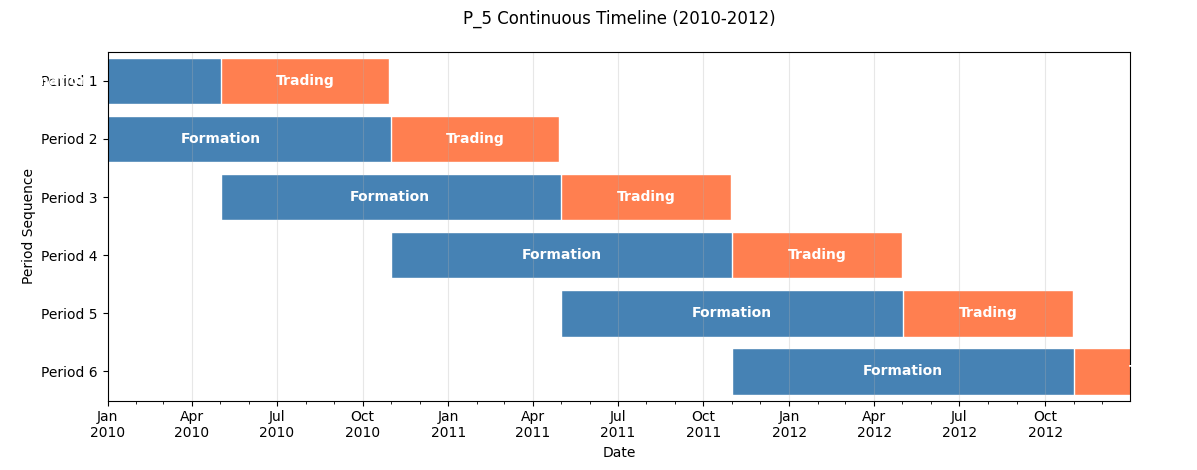

In [236]:
fig = plot_portfolio_timeline_scaled("P_5", 2010, portfolio_timeline)
plt.show()


In [14]:
table_4_1 = make_table_4_1(rt_df_1)  # df: Date index, tickers as columns, daily % returns, NaNs allowed
print(table_4_1)

                                        Mean  Std. Dev.    Min     Max
Daily Return (%)                        0.09       2.74 -92.65  443.39
Annualized Volatility (%)              41.61      12.36  22.07  100.26
Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


In [15]:
rt_df_1.describe(percentiles=[0.01,0.05,0.95,0.99]).T[['mean','std','min','max']]


,mean,std,min,max
ABB.NS,0.001944,0.063164,-0.169731,4.433939
ACC.NS,0.000727,0.020039,-0.149378,0.144845
ADANIPORTS.NS,0.000818,0.026663,-0.211497,0.200022
APOLLOHOSP.NS,0.001121,0.022043,-0.149895,0.200068
ASHOKLEY.NS,0.001411,0.029636,-0.246274,0.632964
ASIANPAINT.NS,0.001022,0.016549,-0.140279,0.096587
AUROPHARMA.NS,0.001379,0.032946,-0.499977,1.002193
AXISBANK.NS,0.001255,0.025953,-0.279108,0.200417
BAJAJ-AUTO.NS,0.001039,0.019895,-0.424335,0.134238
BAJAJFINSV.NS,0.000871,0.027738,-0.926483,0.200068


In [15]:
def winsorize_series(s, q=0.0001):
    lower, upper = s.quantile(q), s.quantile(1 - q)
    return s.clip(lower, upper)

df_clean = rt_df_1.apply(winsorize_series, axis=0)
table_4_1 = make_table_4_1(df_clean, returns_are_percent=False)
print(table_4_1)
#                                         Mean  Std. Dev.    Min     Max
# Daily Return (%)                        0.09       2.64 -76.62  208.63
# Annualized Volatility (%)              40.53      10.44  19.87   64.09
# Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


                                        Mean  Std. Dev.    Min     Max
Daily Return (%)                        0.09       2.64 -76.62  208.63
Annualized Volatility (%)              40.53      10.44  19.87   64.09
Cross-Sectional Correlation (Rolling)   0.26       0.06   0.12    0.41


In [20]:
len(df_clean.columns)
df_clean.to_csv("data/NSE_CLEAN_RET.csv")